## **ENIGH** - Pruebas de Hipótesis (Chi-Cuadrada)
* 8 de Abril del 2025
#### ESCOM - IPN: *Modelado Predictivo*
#### Prof. Claudia Blanquel

#### *Lic. Ciencia de Datos* - 6AM1

> Armas Ramirez Daniel

> Gutierrez Ramirez Alana Sofia

> Hernández Peña Irving Jafet

> Reyes Maldonado Oscar Romario

> Sanchez Garcia Miguel Alexander

#### **0° Introducción**

Datos obtenidos de:

> https://www.inegi.org.mx/programas/enigh/nc/2016/#datos_abiertos

**a.** Como primer paso, necesitamos **importar** todas las **librerias** que usaremos

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency


**b.** Extraer la tabla necesaria de la base de datos

In [5]:
# Cargar los datos
data = pd.read_csv('data_enigh/ENIGH_2016_cleaned.csv')

# Determinar si el hogar está en endeudamiento
data['endeudamiento'] = data['total_ingreso'] < data['total_gasto']

# Llevar endeudamiento a 1 y 0
data['endeudamiento'] = data['endeudamiento'].astype(int)

data.head()

,folioviv,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,p12_64,p65mas,ocupados,percep_ing,perc_ocupa,total_gasto,total_ingreso,endeudamiento
0,100003801,1,33,10,2,1,1,2,0,2,2,2,64108.15,100696.70,0
1,100003802,1,29,10,2,1,1,2,0,2,2,2,87788.40,147496.59,0
2,100003803,1,47,10,6,2,4,3,0,1,1,1,78571.19,94622.95,0
3,100003804,2,29,11,3,0,3,3,0,2,3,2,51304.82,58278.65,0
4,100003805,1,55,10,2,2,0,2,0,1,1,1,47589.29,57295.07,0


#### **1° Prueba de Hipótesis (Chi-Cuadrada)**

In [ ]:
independent_vars = data.columns[1:14] 
dependent_var = 'endeudamiento'

results = []

for var in independent_vars:
    contingency = pd.crosstab(data[var], data[dependent_var])
    
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({
            'variable': var,
            'chi2': chi2,
            'p_value': p,
            'degrees_of_freedom': dof
        })

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results).sort_values('p_value')
print(results_df)


         variable          chi2        p_value  degrees_of_freedom
10     perc_ocupa    714.366719  4.486237e-146                  11
1       edad_jefe    847.701174  4.295733e-123                  91
8        ocupados    551.845632  2.754520e-111                  11
7          p65mas    423.846549   2.145821e-89                   5
6          p12_64    353.249803   1.606957e-67                  13
9      percep_ing    205.199732   7.037292e-35                  16
2      educa_jefe    174.513367   3.221236e-32                  10
3       tot_integ    192.770759   9.278369e-31                  19
0       sexo_jefe     51.918105   5.786438e-13                   1
5         mujeres     72.993609   2.246198e-10                  13
4         hombres     49.716562   1.566712e-06                  12
11    total_gasto  69887.390070   4.162493e-01               69809
12  total_ingreso  68212.739102   8.305892e-01               68567


Variables significativas:
perc_ocupa
edad_jefe
ocupados
p65mas
p12_64
percep_ing
educa_jefe
tot_integ
sexo_jefe
mujeres
hombres


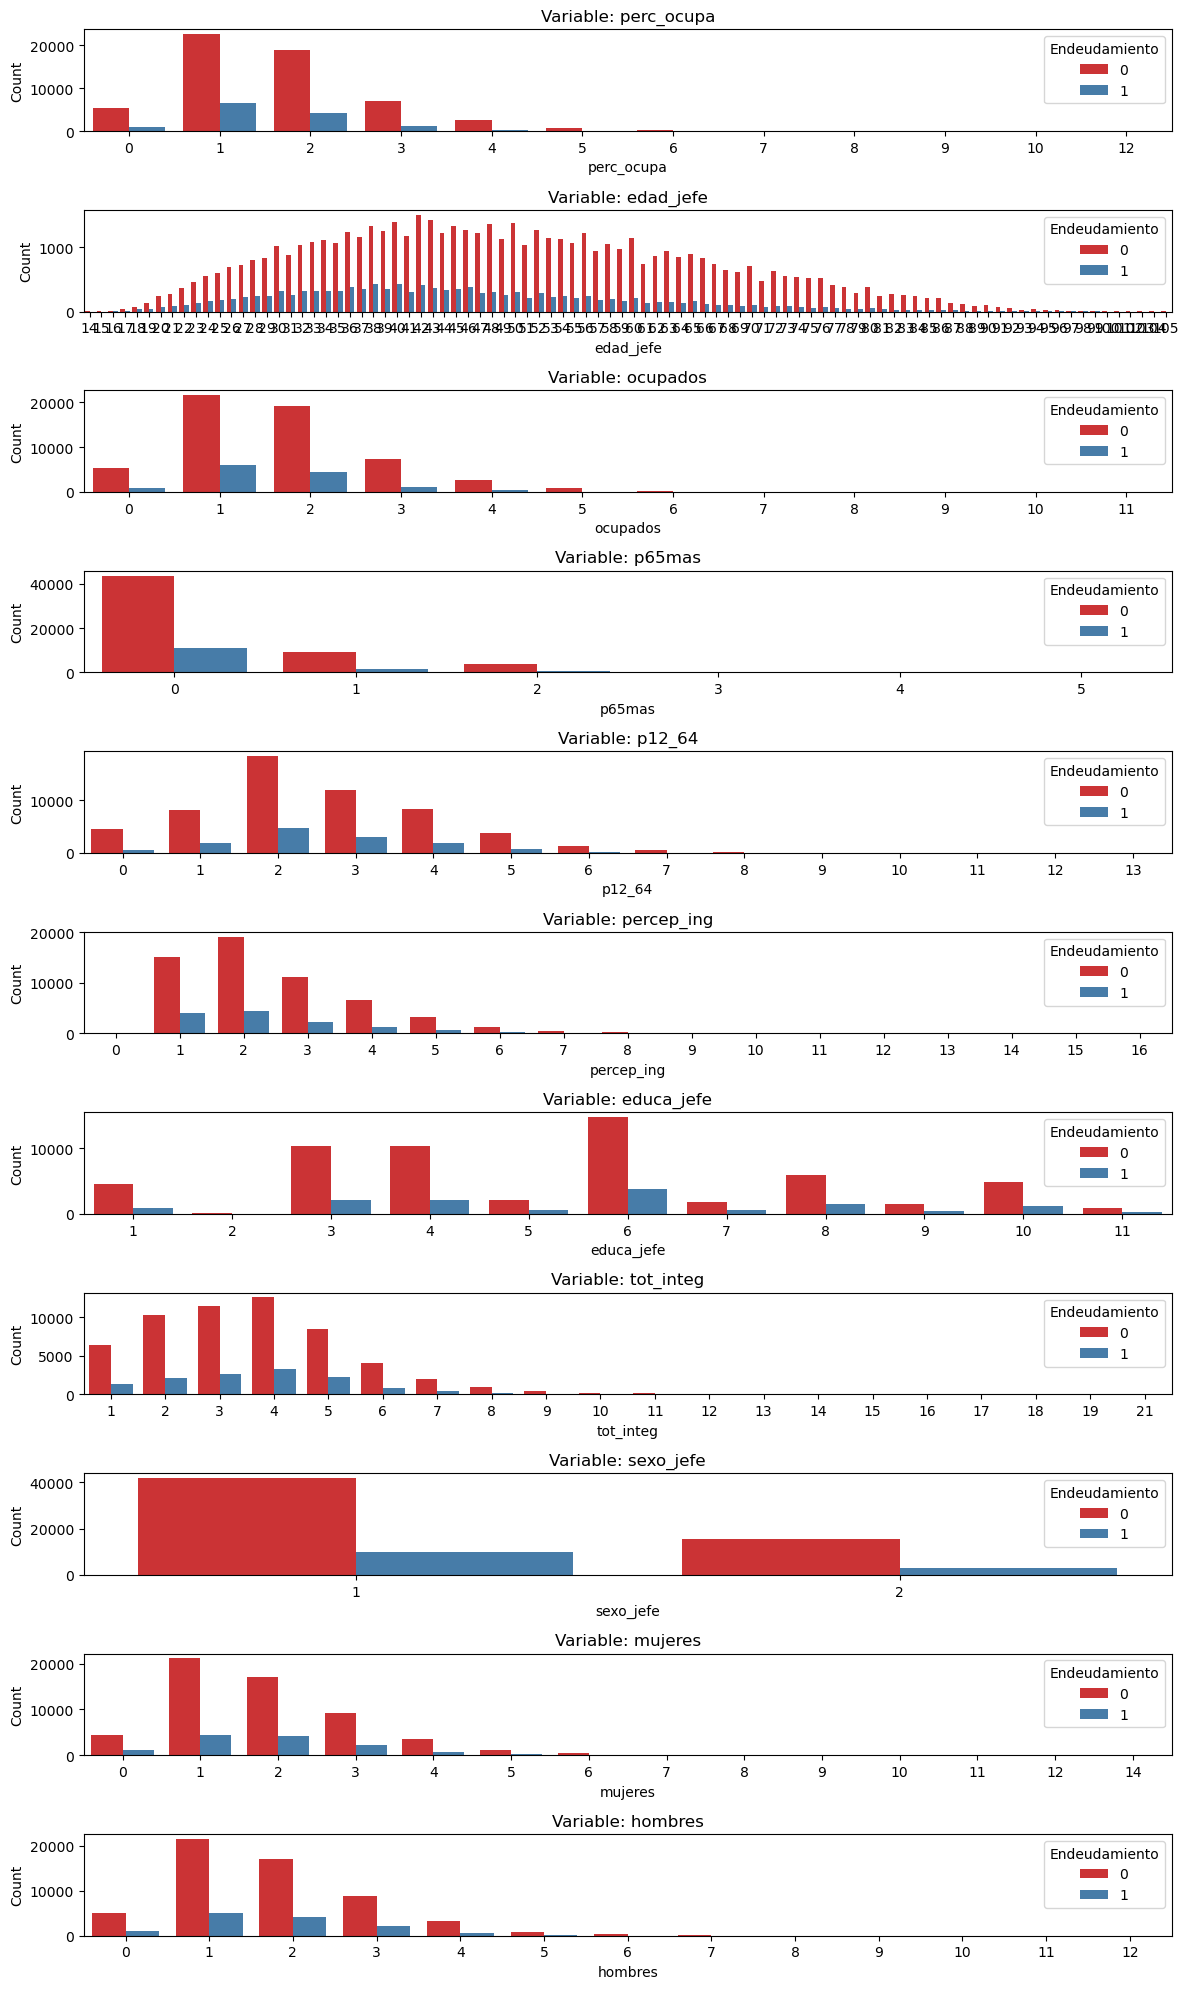

In [16]:
# Revisar que variables son significativas
significant_vars = results_df[results_df['p_value'] < 0.05]['variable'].tolist()
print("Variables significativas:")
for var in significant_vars:
    print(var)

# Graficar las variables significativas
plt.figure(figsize=(12, 20))
for i, var in enumerate(significant_vars):
    plt.subplot(len(significant_vars), 1, i + 1)
    sns.countplot(data=data, x=var, hue='endeudamiento', palette='Set1')
    plt.title(f'Variable: {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Endeudamiento', loc='upper right')
plt.tight_layout()
plt.show()